In [6]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("./data/customer_features_cleaned.csv")

# 1.2 Kiểm tra thông tin cơ bản
df.head()   

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Year,Month,Day,Hour,Weekday,DateOnly,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,42.075,2009,12,1,7,Tuesday,2009-12-01,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,42.075,2009,12,1,7,Tuesday,2009-12-01,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,42.075,2009,12,1,7,Tuesday,2009-12-01,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",27,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,42.075,2009,12,1,7,Tuesday,2009-12-01,56.7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.000,2009,12,1,7,Tuesday,2009-12-01,30.0


In [8]:
df = df[df['Quantity'] > 0]

df = df.dropna(subset=['Invoice', 'StockCode', 'Description'])

In [9]:
basket = pd.crosstab(df['Invoice'], df['StockCode'])

basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket.head()

C:\Users\dangth\AppData\Local\Temp\ipykernel_25576\968520229.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


StockCode,10002,10080,10109,10120,10123C,10123G,10124A,10124G,10125,10133,...,BANK CHARGES,C2,D,DOT,M,PADS,POST,SP1002,TEST001,TEST002
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
product_mapping = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()

In [11]:
frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

C:\Users\dangth\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.051197,(21232)
1,0.024151,(21523)
2,0.016227,(21871)
3,0.012955,(22064)
4,0.011684,(85048)


In [12]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = rules[rules['lift'] > 1]
rules = rules.sort_values(by=['confidence', 'lift'], ascending=False)


In [13]:
def decode_items(itemset):
    return tuple(f"{item} - {product_mapping.get(item, 'Unknown')}" for item in itemset)

rules['Sản phẩm A'] = rules['antecedents'].apply(decode_items)
rules['Sản phẩm B'] = rules['consequents'].apply(decode_items)


In [14]:
rules_display = rules[['Sản phẩm A', 'Sản phẩm B', 'support', 'confidence', 'lift']]
rules_display.columns = ['Sản phẩm A', 'Sản phẩm B', 'Support', 'Confidence', 'Lift']
rules_display.head(10)


,Sản phẩm A,Sản phẩm B,Support,Confidence,Lift
209,"(22698 - TEACUP AND SAUCER REGENCY PINK, 22699...","(22697 - TEACUP AND SAUCER REGENCY GREEN,)",0.014659,0.895868,35.015550
215,"(22698 - TEACUP AND SAUCER REGENCY PINK, 22423...","(22697 - TEACUP AND SAUCER REGENCY GREEN,)",0.010385,0.890951,34.823386
238,"(22746 - POPPY'S PLAYHOUSE LIVINGROOM ,)","(22748 - POPPY'S PLAYHOUSE KITCHEN,)",0.011034,0.886957,53.238989
217,"(22698 - TEACUP AND SAUCER REGENCY PINK, 22423...","(22699 - TEACUP AND SAUCER REGENCY ROSES,)",0.010088,0.865429,29.905837
207,"(22697 - TEACUP AND SAUCER REGENCY GREEN, 2269...","(22699 - TEACUP AND SAUCER REGENCY ROSES,)",0.014659,0.853543,29.495106
236,"(22745 - POPPY'S PLAYHOUSE BEDROOM ,)","(22748 - POPPY'S PLAYHOUSE KITCHEN,)",0.012765,0.848921,50.955924
203,"(22698 - TEACUP AND SAUCER REGENCY PINK,)","(22697 - TEACUP AND SAUCER REGENCY GREEN,)",0.017174,0.841060,32.873339
200,"(22697 - TEACUP AND SAUCER REGENCY GREEN, 2242...","(22699 - TEACUP AND SAUCER REGENCY ROSES,)",0.011981,0.840607,29.048086
239,"(22746 - POPPY'S PLAYHOUSE LIVINGROOM ,)","(22745 - POPPY'S PLAYHOUSE BEDROOM ,)",0.010331,0.830435,55.225407
111,"(21124 - SET/10 BLUE POLKADOT PARTY CANDLES,)","(21122 - SET/10 PINK POLKADOT PARTY CANDLES,)",0.012982,0.801336,40.093887


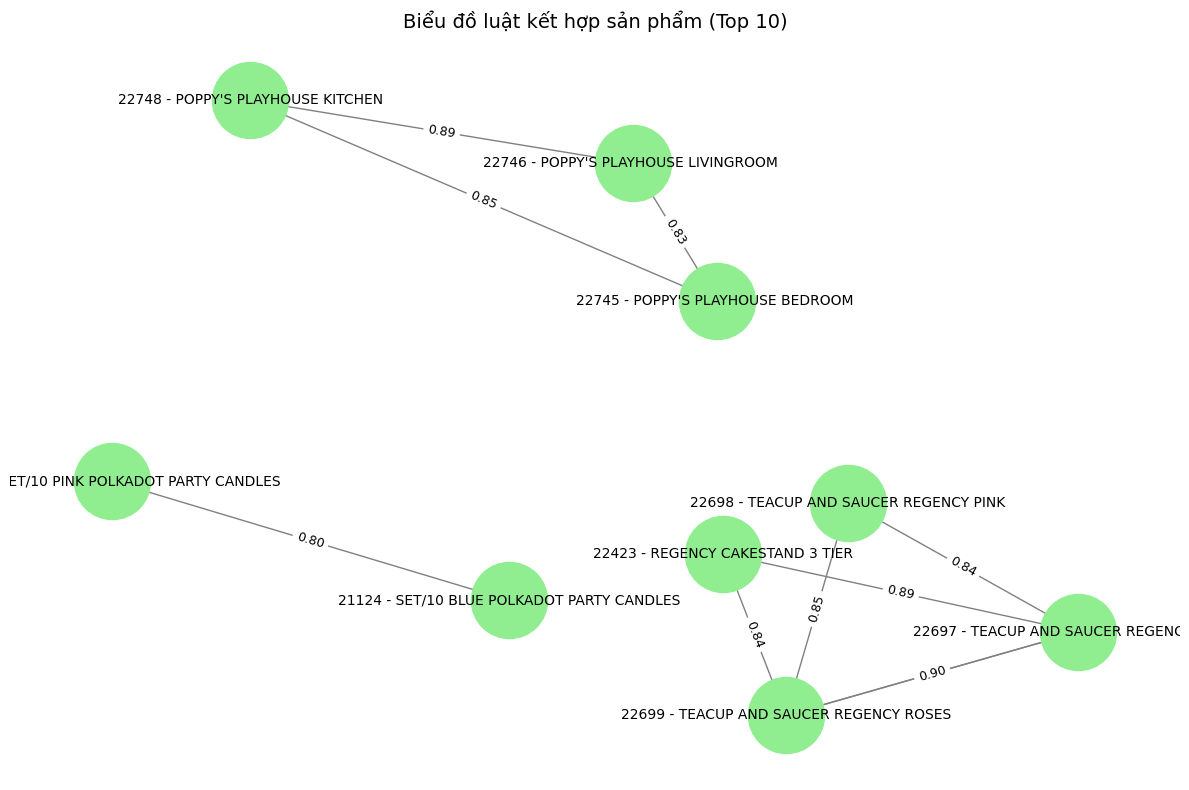

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Tạo đồ thị
G = nx.DiGraph()

# Lấy top 10 luật mạnh nhất
top_rules = rules.head(10)

# Thêm node và edge
for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            ante_desc = f"{antecedent} - {product_mapping.get(antecedent, 'Unknown')}"
            cons_desc = f"{consequent} - {product_mapping.get(consequent, 'Unknown')}"
            G.add_edge(ante_desc, cons_desc, weight=row['confidence'])

# Kích thước hình
plt.figure(figsize=(12, 8))

# Tạo vị trí các nút
pos = nx.spring_layout(G, k=0.8, seed=42)

# Vẽ các node
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightgreen')

# Vẽ các edge
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', edge_color='gray')

# Vẽ label
nx.draw_networkx_labels(G, pos, font_size=10)

# Vẽ label cho edge: confidence
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Biểu đồ luật kết hợp sản phẩm (Top 10)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


C:\Users\dangth\AppData\Local\Temp\ipykernel_25576\237488792.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_quantity, y='Description', x='Quantity', palette='viridis')


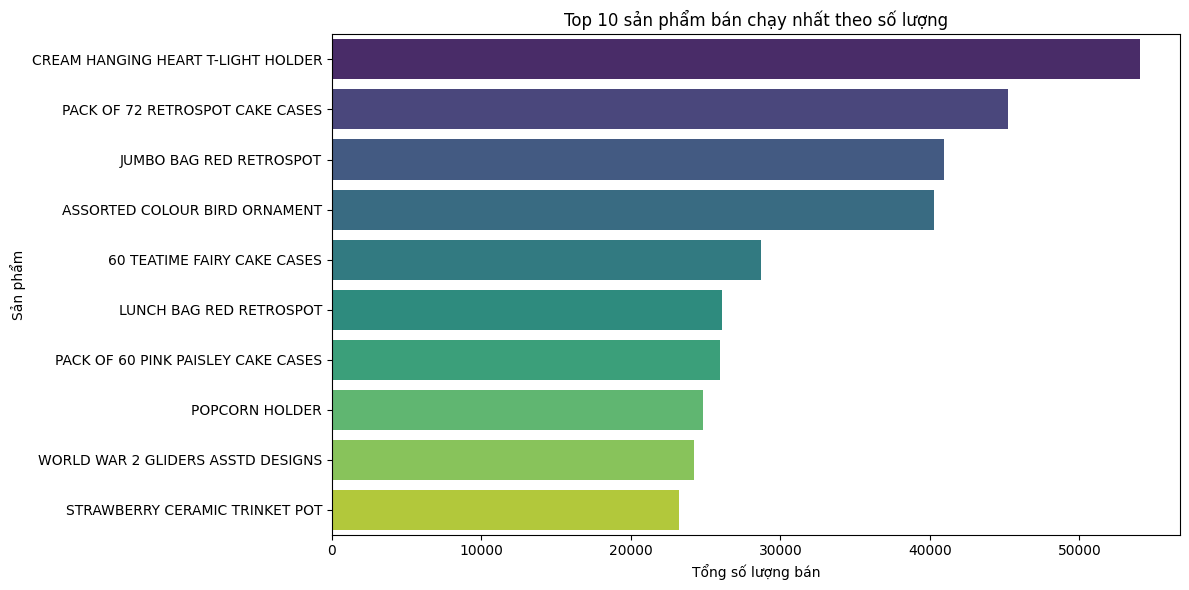

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính tổng Quantity cho mỗi sản phẩm (StockCode)
top10_quantity = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

# Lấy tên sản phẩm tương ứng
top10_quantity = top10_quantity.reset_index()
top10_quantity['Description'] = top10_quantity['StockCode'].map(product_mapping)

# Vẽ biểu đồ bar
plt.figure(figsize=(12,6))
sns.barplot(data=top10_quantity, y='Description', x='Quantity', palette='viridis')

plt.title('Top 10 sản phẩm bán chạy nhất theo số lượng')
plt.xlabel('Tổng số lượng bán')
plt.ylabel('Sản phẩm')
plt.tight_layout()
plt.show()


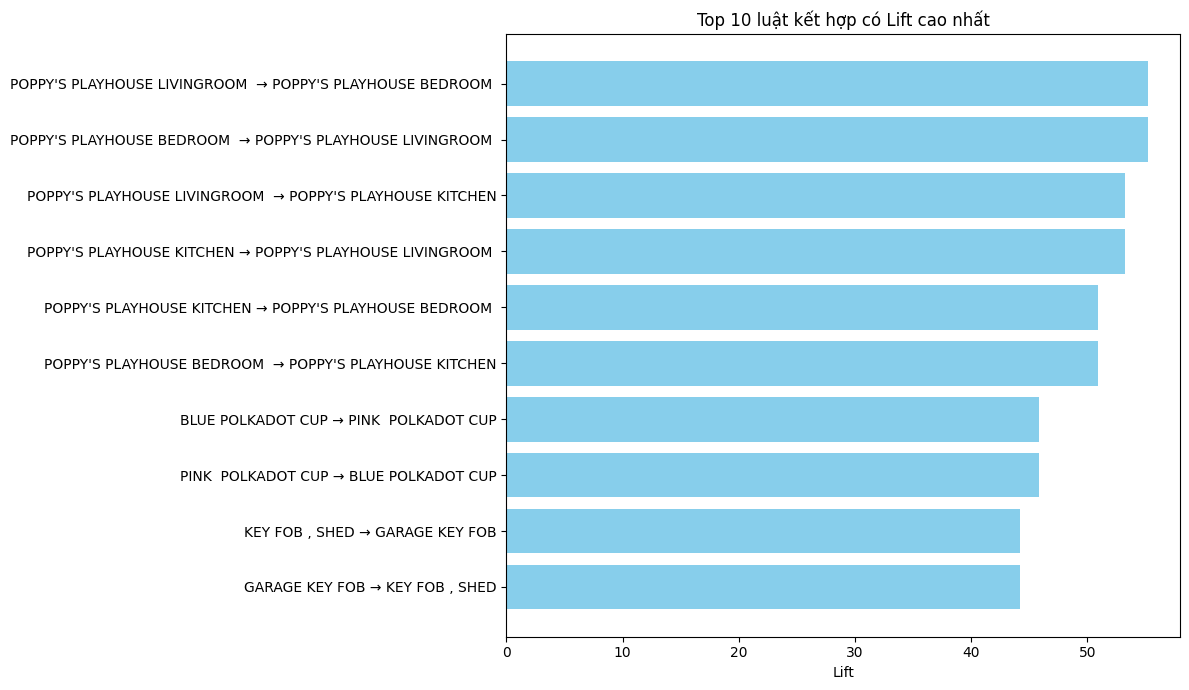

In [18]:
import matplotlib.pyplot as plt

# Giả sử bạn đã có biến product_mapping: dict StockCode -> Tên sản phẩm

# Lấy top 10 luật theo lift giảm dần
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Tạo danh sách nhãn kiểu: "Tên SP1 → Tên SP2"
labels = []
for a, c in zip(top_rules['antecedents'], top_rules['consequents']):
    antecedents_names = [product_mapping.get(code, str(code)) for code in a]
    consequents_names = [product_mapping.get(code, str(code)) for code in c]
    label = f"{', '.join(antecedents_names)} → {', '.join(consequents_names)}"
    labels.append(label)

plt.figure(figsize=(12,7))
plt.barh(range(len(top_rules)), top_rules['lift'], color='skyblue')
plt.yticks(range(len(top_rules)), labels)
plt.xlabel('Lift')
plt.title('Top 10 luật kết hợp có Lift cao nhất')
plt.gca().invert_yaxis()  # Đảo chiều y để luật lift cao nhất lên trên
plt.tight_layout()
plt.show()
